<a href="https://www.kaggle.com/code/azadehbagheri/loan-statuas?scriptVersionId=152724379" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 # 1-Summary

## Data Set Problems 🤔

👉 The company seeks **to automate (in real time) the loan qualifying procedure** based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in **accelerating decision-making process** for determining whether an applicant is eligible for a loan or not.

👨‍💻 **The machine learning models used in this project are:** 
1. Logistic Regression
2. K-Nearest Neighbour (KNN)
3. Support Vector Machine (SVM)
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boost


👨‍💻 **The machine learning models used in this project are:** 
1. Logistic Regression
2. K-Nearest Neighbour (KNN)
3. Support Vector Machine (SVM)
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boost

## Data Set Description 🧾
👉 There are **13 variables** in this data set:
*   **8 categorical** variables,
*   **4 continuous** variables, and
*   **1** variable to accommodate the loan ID.


# 2. Importing Libraries 📚
👉 Importing libraries that will be used in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import missingno as mso
import seaborn as sns
import warnings
import os
import scipy
from sklearn.preprocessing import LabelEncoder

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score


# 3. Reading Data Set

In [2]:
df = pd.read_csv("../input/loan-data/train.csv")


In [3]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


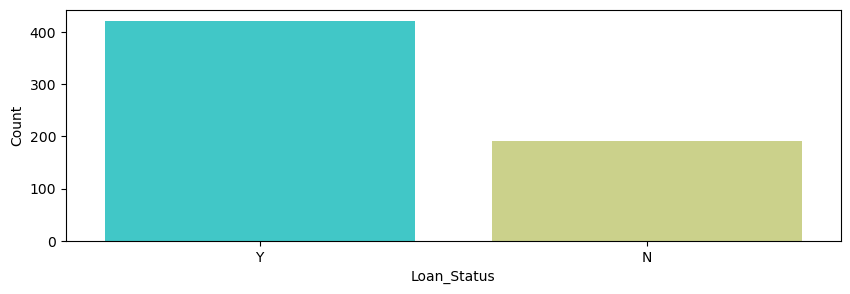

In [4]:
plt.figure(figsize=(10, 3))
sns.barplot(x=df['Loan_Status'].value_counts().index, y=df['Loan_Status'].value_counts(), palette='rainbow')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()

In [5]:
#df2 = pd.read_csv("../input/loan-data/train.csv")


In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


df[['Gender', 'Married', 'Dependents', 'Self_Employed']] = df[['Gender', 'Married', 'Dependents', 'Self_Employed']].fillna(df[['Gender', 'Married', 'Dependents', 'Self_Employed']].mode().iloc[0])# 3. Data prepration 

# 4. Data Cleaning

# 4.1 Fill Null Values


In [8]:
# Count the null values in each column
null_counts = df.isnull().sum()

# Print the null counts
print(null_counts)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [9]:
discrete_columns=['Gender', 'Married', 'Dependents', 'Self_Employed']
df[discrete_columns] = df[discrete_columns].fillna(df[discrete_columns].mode().iloc[0])

In [10]:
# Count the null values in each column
null_counts = df.isnull().sum()

# Print the null counts
print(null_counts)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [11]:
# Create an instance of KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=5)

# Select the continuous columns
continuous_columns = ['Credit_History', 'LoanAmount', 'Loan_Amount_Term']

# Fill null values using KNN imputation
df[continuous_columns] = imputer.fit_transform(df[continuous_columns])

In [12]:
# Count the null values in each column
null_counts = df.isnull().sum()

# Print the null counts
print(null_counts)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [13]:
df = df.drop('Loan_ID', axis=1)

In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,164.6,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 4.2 Data Encoding

In [15]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']
X_encoded = pd.get_dummies(df, columns=categorical_columns)

In [16]:
X_encoded.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,164.6,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1


In [17]:
X_encoded.shape

(614, 22)

In [18]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df_train = pd.get_dummies(df, columns=categorical_columns)

In [19]:
df_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,164.6,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [20]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [21]:

# Select the numeric variables
#numeric_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Normalize the numeric variables
#scaler = MinMaxScaler()
#df[numeric_vars] = scaler.fit_transform(df[numeric_vars])

# Print the normalized data
#print(df)

In [22]:
df_train.shape

(614, 21)

# 5. Visualization


# 5.1 Correlation Plot


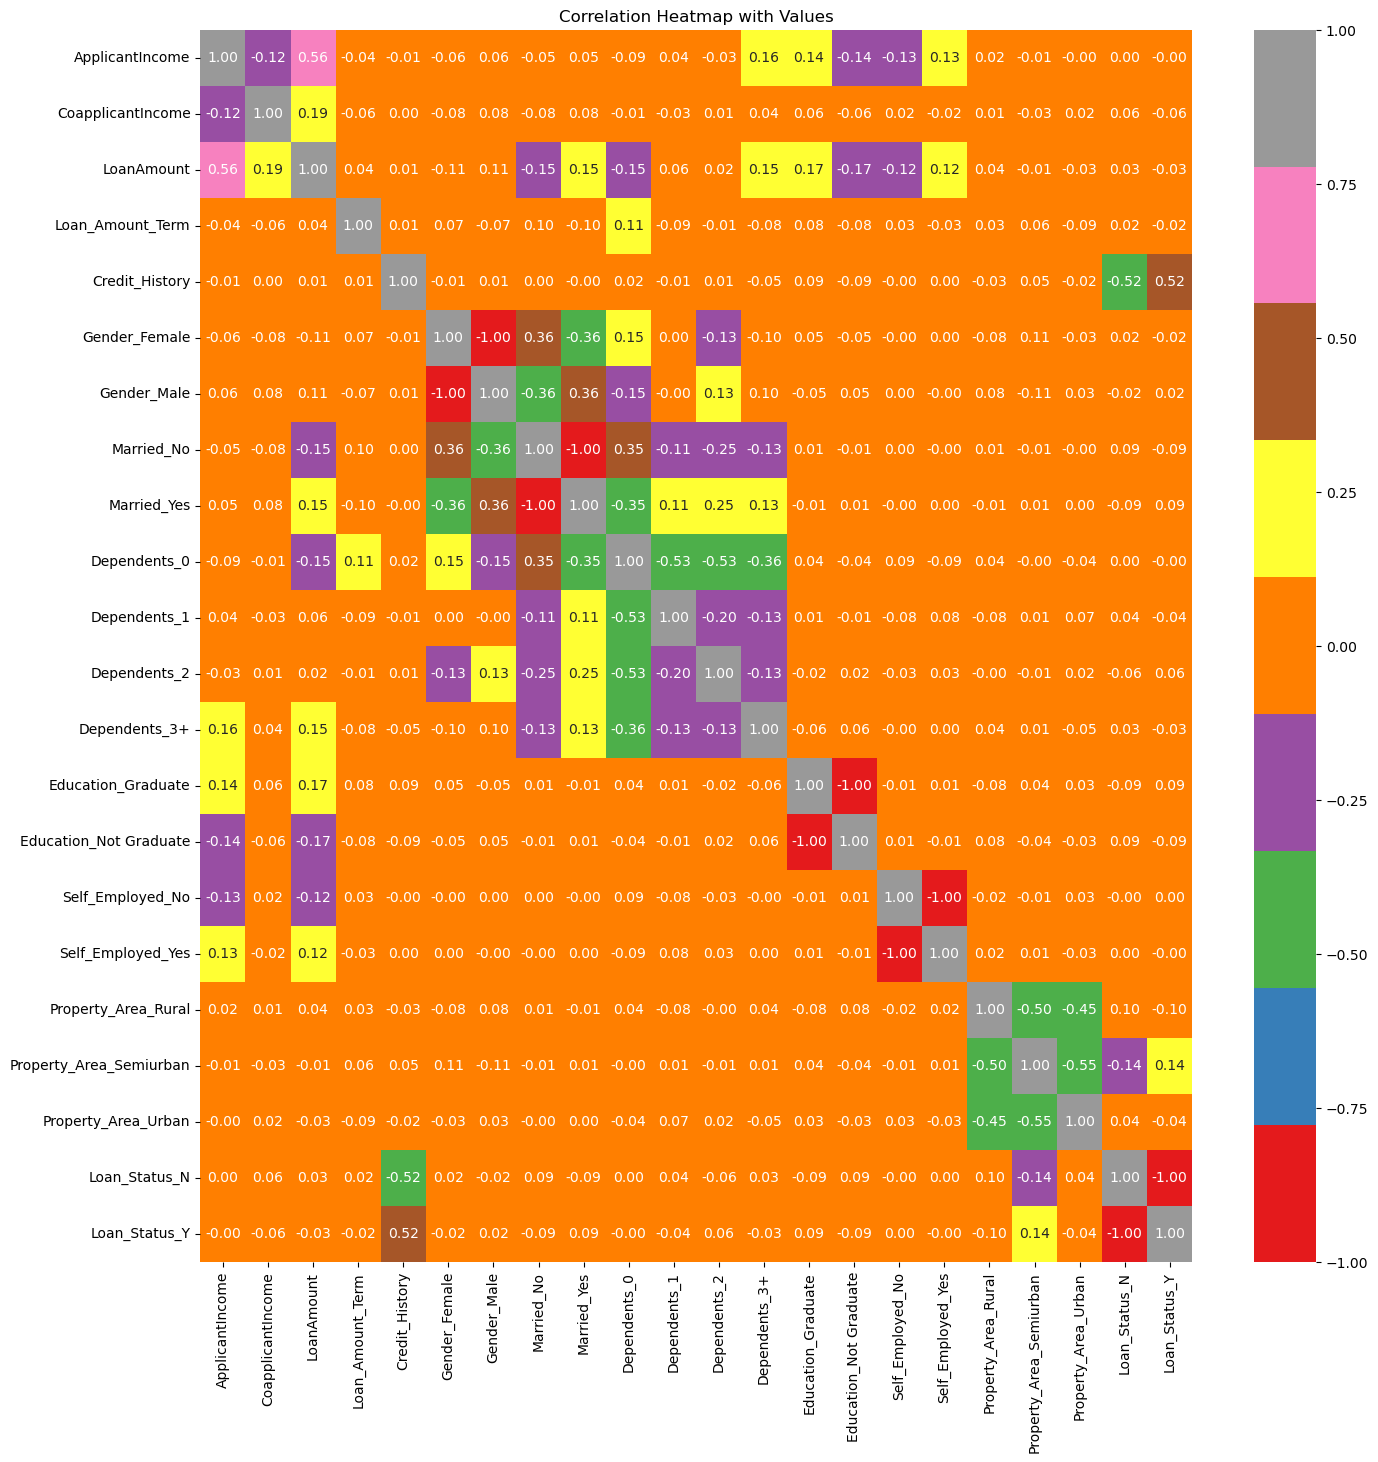

In [23]:

# Create a correlation matrix
cor = X_encoded.corr()

# Create a heatmap with annotations
plt.figure(figsize=(16, 16))
sns.heatmap(cor, annot=True, fmt=".2f", cmap='Set1')

# Add a title
plt.title('Correlation Heatmap with Values')

# Display the plot
plt.show()

In [24]:
# Numeric Variables
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
# Categorical Variables
categorical_columns =['Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'] 


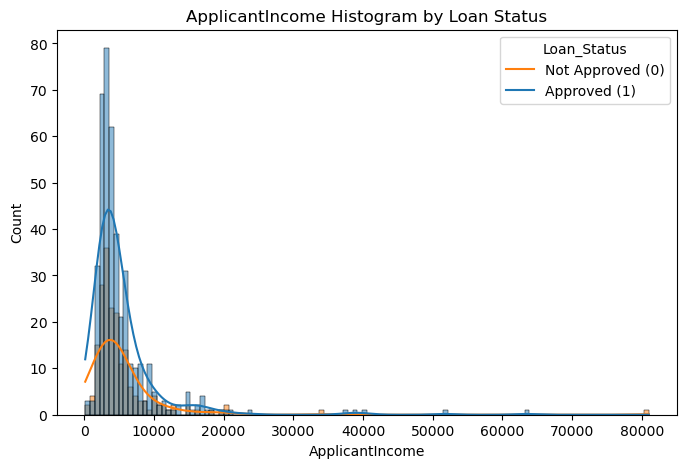

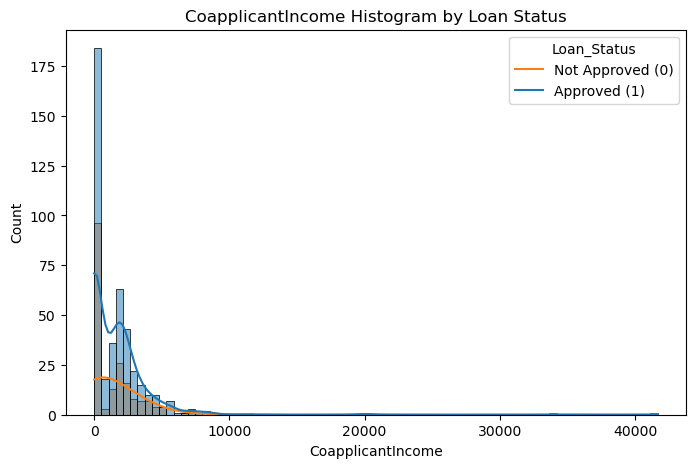

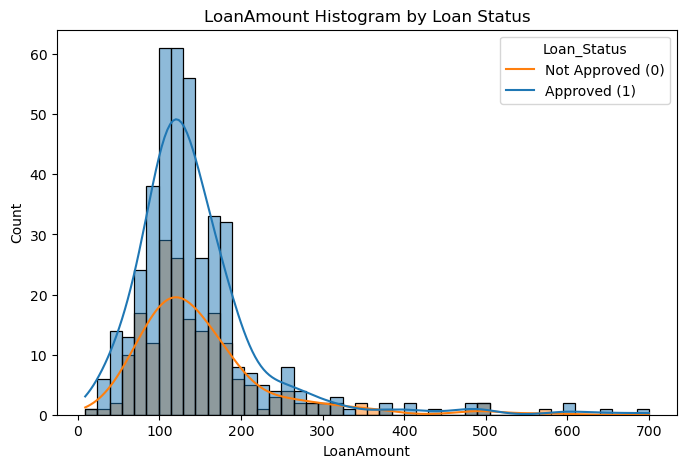

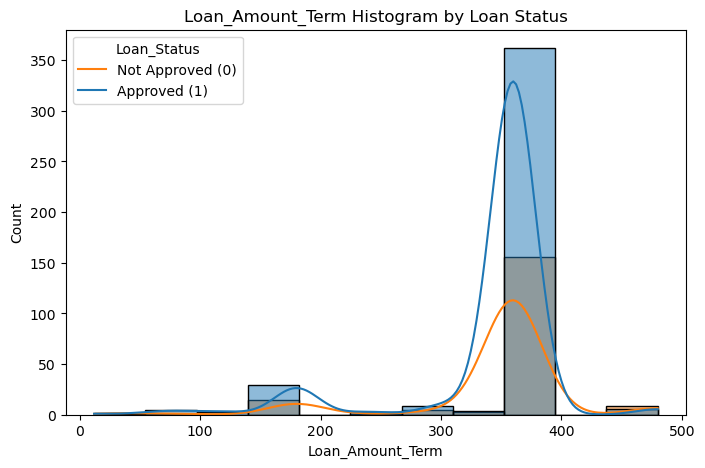

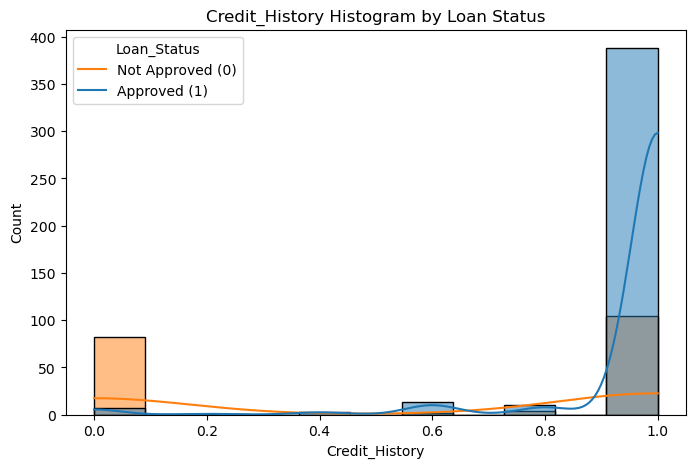

In [25]:


for feature in numeric_columns:
    # Create a histogram for the numeric feature by Loan_Status
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_train, x=feature, hue='Loan_Status', kde=True)
    plt.title(f'{feature} Histogram by Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Loan_Status', labels=['Not Approved (0)', 'Approved (1)'])
    plt.show()


In [26]:
df_train.columns


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

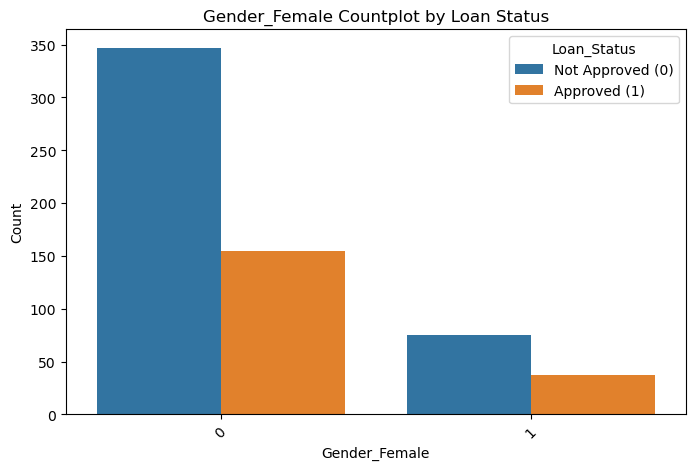

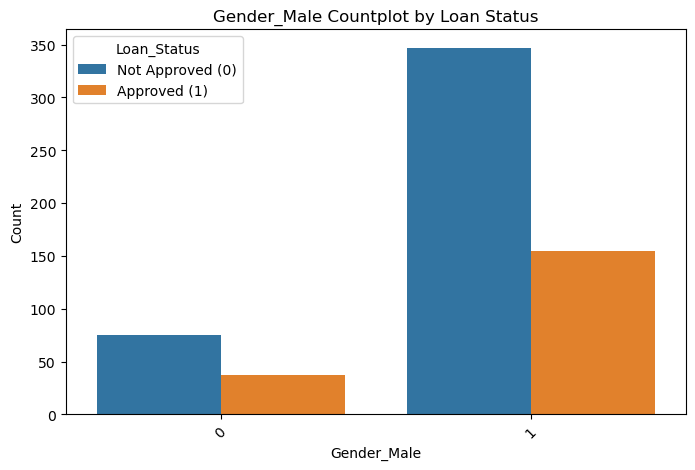

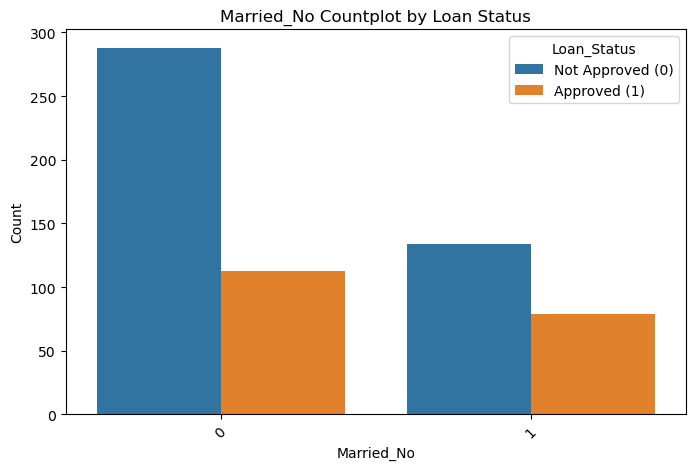

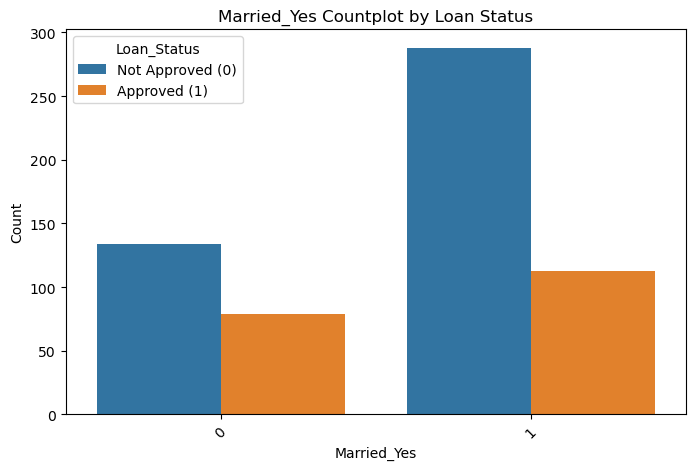

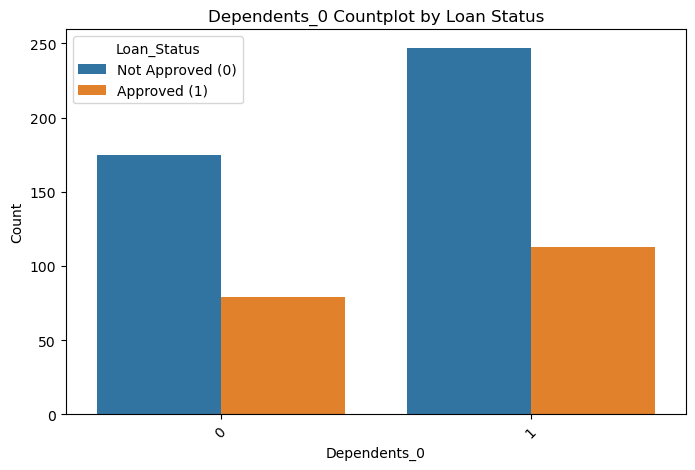

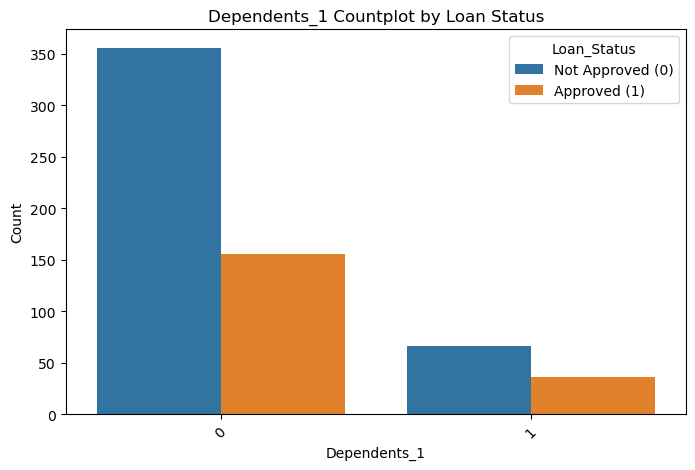

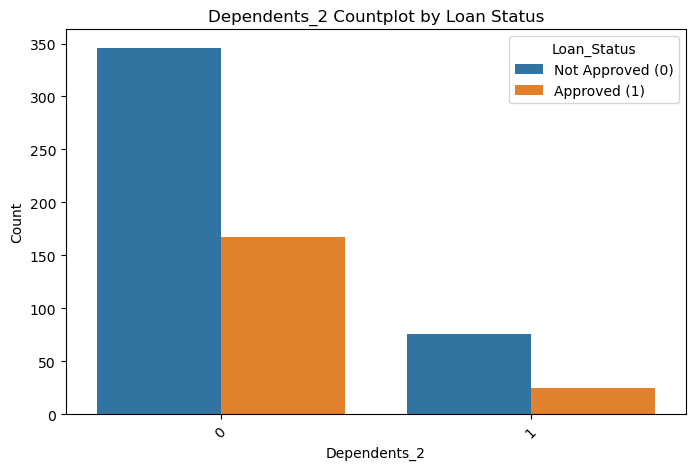

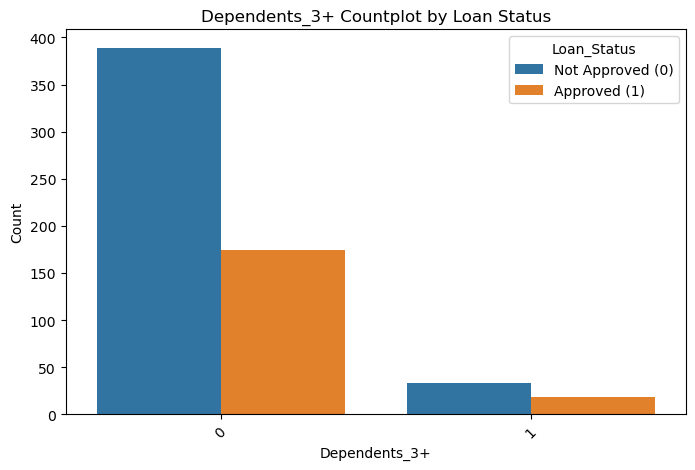

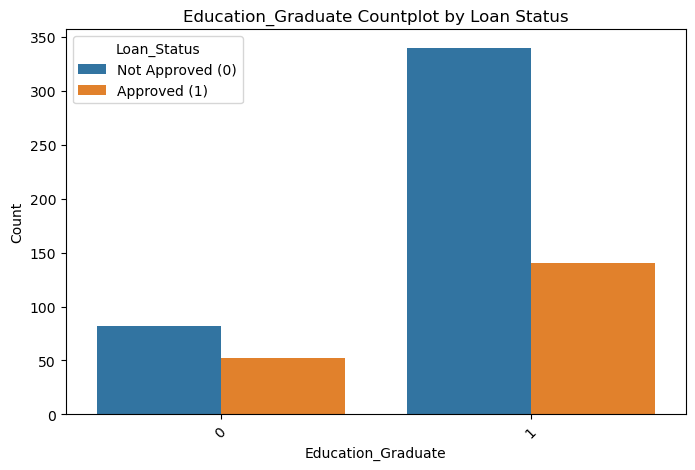

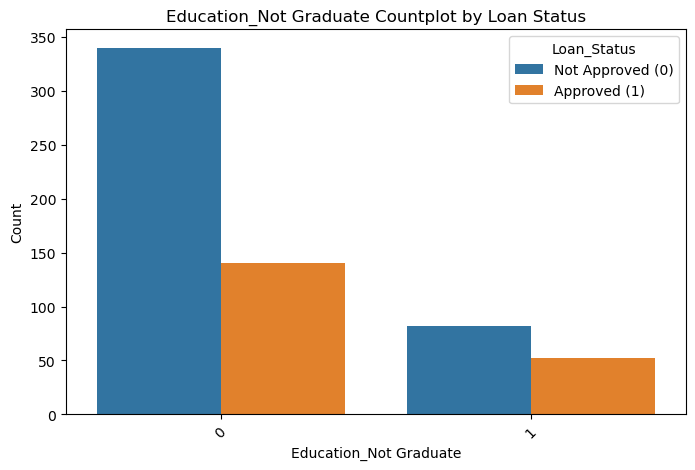

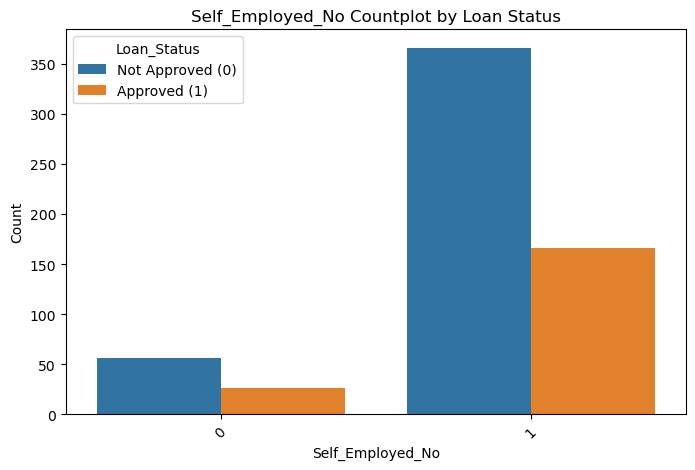

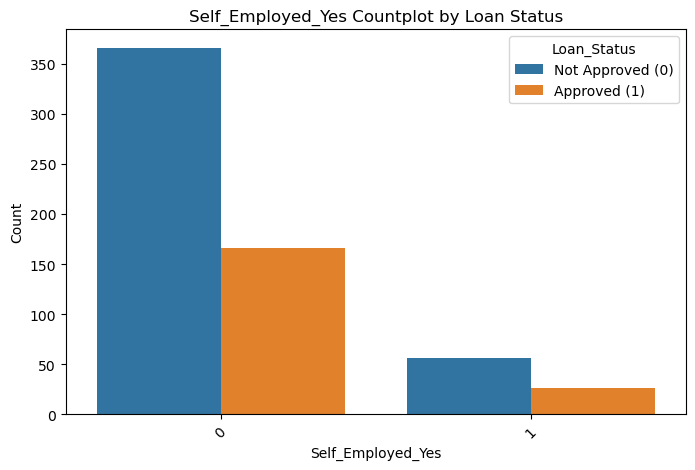

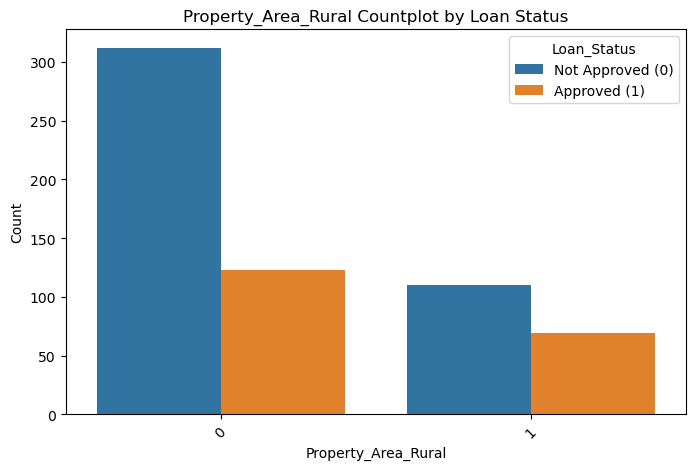

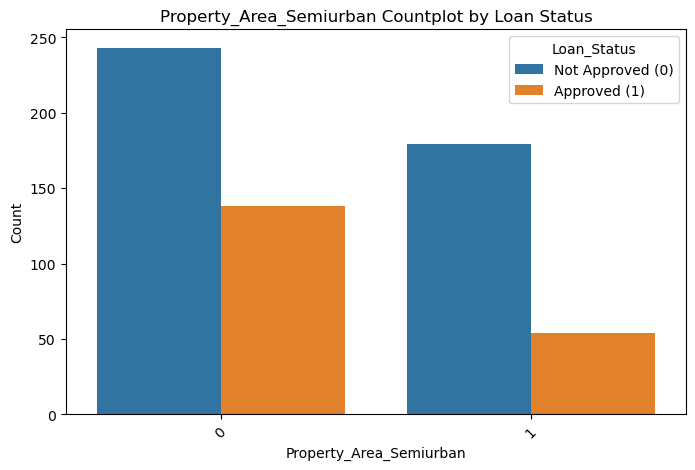

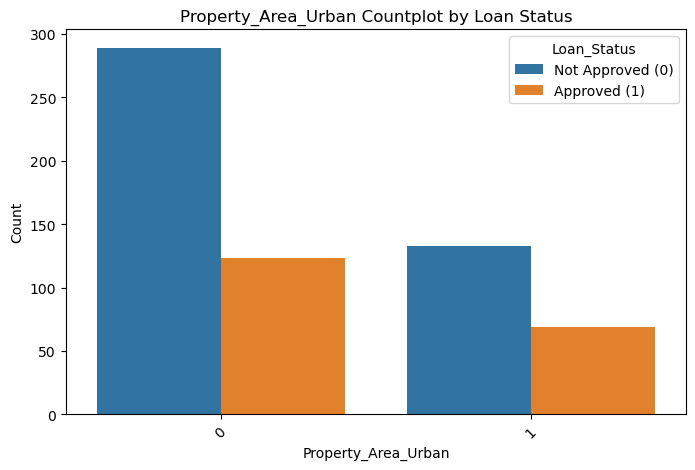

In [27]:
for feature in categorical_columns:
    # Create a countplot for the categorical feature by Loan_Status
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_train, x=feature, hue='Loan_Status')
    plt.title(f'{feature} Countplot by Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Loan_Status', labels=['Not Approved (0)', 'Approved (1)'])
    plt.xticks(rotation=45)
    plt.show()

# 6. Outlier Detection

In [28]:

# Set a Z-score threshold for identifying outliers
z_threshold = 3.0

# Create a dictionary to store the number of outliers for each column
outliers_count = {}

for feature in numeric_columns:
    # Calculate the Z-score for each data point in the feature
    z_scores = stats.zscore(df_train[feature])
    
    # Find indices of data points with Z-scores exceeding the threshold
    outlier_indices = abs(z_scores) > z_threshold
    
    # Count the number of outliers
    num_outliers = sum(outlier_indices)
    
    # Store the number of outliers in the dictionary
    outliers_count[feature] = num_outliers

# Print the number of outliers for each column
for feature, count in outliers_count.items():
    print(f"Number of outliers in {feature}: {count}")

Number of outliers in ApplicantIncome: 8
Number of outliers in CoapplicantIncome: 6
Number of outliers in LoanAmount: 15
Number of outliers in Loan_Amount_Term: 12
Number of outliers in Credit_History: 0


## 7. Splitting Data Set 🪓

In [29]:
# Assuming 'data' is your DataFrame that contains the features and the target variable
X = df_train.drop('Loan_Status', axis=1)
y = df_train['Loan_Status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

#Create the StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform X_train
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)
# Create a new DataFrame with the scaled values and the original column names
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# X_train_scaled_df is now a DataFrame with scaled values

In [31]:
X_train.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.083915,0.180667,1.347955,0.294561,-0.110788,-0.483393,0.483393,-0.757442,0.757442,0.822051,-0.43789,-0.434583,-0.301846,0.534173,-0.534173,0.397516,-0.397516,-0.63471,1.253268,-0.692037
1,-0.429338,0.385430,-0.205092,0.294561,0.455848,-0.483393,0.483393,-0.757442,0.757442,0.822051,-0.43789,-0.434583,-0.301846,0.534173,-0.534173,0.397516,-0.397516,-0.63471,1.253268,-0.692037
2,0.126095,0.005831,0.710510,0.294561,0.455848,-0.483393,0.483393,-0.757442,0.757442,-1.216469,-0.43789,2.301059,-0.301846,0.534173,-0.534173,0.397516,-0.397516,-0.63471,1.253268,-0.692037


# 6. Models 🛠

In [32]:
# Create an instance of Logistic Regression
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7804878048780488


In [33]:
# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7235772357723578


In [34]:
# Create an instance of SVC
svm = SVC(kernel='linear')

# Train the SVM model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7886178861788617


In [35]:
X[X < 0] = 0

# Encode categorical variables if present
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create the CategoricalNB model
nb = CategoricalNB()

# Fit the model on the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Calculate the accuracy of the model
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)






Accuracy: 0.7560975609756098


In [36]:
# Create an instance of GaussianNB
nb = GaussianNB()

# Train the GaussianNB model on the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7804878048780488


In [37]:
# Create an instance of DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train the Decision Tree model on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7398373983739838


In [38]:
# Create an instance of RandomForestClassifier
rf = RandomForestClassifier()

# Train the Random Forest model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7723577235772358


In [39]:
# Create an instance of GradientBoostingClassifier
gb = GradientBoostingClassifier()

# Train the Gradient Boosting model on the training data
gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb.predict(X_test)
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7642276422764228


# 7.saving trained model

In [40]:
import pickle

# Dump the trained model using pickle
filename = '/kaggle/working/trained_model.sav'
pickle.dump(gb, open(filename, 'wb'))

# Load saved model
loaded_model = pickle.load(open(filename, 'rb'))

In [41]:
#load saved model
input_data=(441,0,155,11,5,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
    print(' Not approved')
else:
    print('approved')

['Y']
approved


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [42]:
X_test.columns
      

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [43]:
X_test.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
350,441,0,155,11,5,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0
377,292,0,86,11,3,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0
163,280,54,113,11,5,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
